In [2]:
from __future__ import annotations

from qamsi.utils.data import read_csv

from run import Dataset

DATASET = Dataset.TOPN_US.value(topn=50)

In [3]:
data_df = read_csv("../../data/output", DATASET.DF_FILENAME)

In [4]:
data_df["acc_rate"]

date
1980-01-31    0.000100
1980-02-01    0.000122
1980-02-04    0.000367
1980-02-05    0.000122
1980-02-06    0.000122
                ...   
2024-12-24         NaN
2024-12-26         NaN
2024-12-27         NaN
2024-12-30         NaN
2024-12-31         NaN
Name: acc_rate, Length: 11324, dtype: float64

In [7]:
data_df["acc_rate"].loc["2007-01-01":"2007-12-31"].add(1).prod() - 1

0.01868534748581796

In [12]:
import pandas as pd

ff = pd.read_excel("../../data/ff/FFDaily.xlsx")
ff = ff.rename(columns={"Date": "date"})
ff["date"] = pd.to_datetime(ff["date"], format="%Y%m%d")
ff = ff.set_index("date")
ff

,Mkt-RF,SMB,HML,RF
date,,,,
1926-07-01,0.10,-0.25,-0.27,0.009
1926-07-02,0.45,-0.33,-0.06,0.009
1926-07-06,0.17,0.30,-0.39,0.009
1926-07-07,0.09,-0.58,0.02,0.009
1926-07-08,0.21,-0.38,0.19,0.009
...,...,...,...,...
2024-08-26,-0.34,0.10,0.16,0.022
2024-08-27,0.06,-0.86,0.02,0.022
2024-08-28,-0.67,-0.55,1.14,0.022


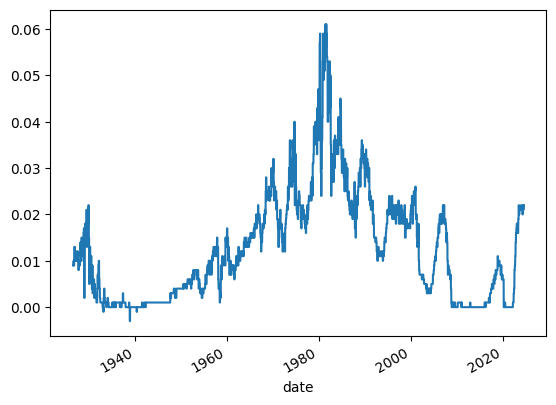

In [13]:
ff["RF"].plot();

In [14]:
ff["RF"].loc["2007-01-01":"2007-12-31"].add(1).prod() - 1

89.517993656017

In [16]:
(ff["RF"] / 100).loc["2007-01-01":"2007-12-31"].add(1).prod() - 1

0.046515216923431746

In [1]:
from pathlib import Path

import pandas as pd

from qamsi.market_data.risk_free_conventions import accrue_risk_free_rate
from qamsi.utils.data import read_csv
from run import Dataset

DATASET = Dataset.TOPN_US.value(topn=30)
data_df = read_csv("../../data/output", DATASET.DF_FILENAME)

rf = pd.read_excel(Path("../../data/ff") / "FFDaily.xlsx")
rf = rf.rename(columns={"Date": "date", "RF": "rf"})
rf["date"] = pd.to_datetime(rf["date"], format="%Y%m%d")
rf = rf.set_index("date")
rf = rf["rf"] / 100

rf = rf.rename("acc_rate")
# rf = accrue_risk_free_rate(rf_rate=rf).rename("acc_rate")

data_df = data_df.drop(columns=["acc_rate"])
data_df = data_df.merge(rf, left_index=True, right_index=True)

In [15]:
data_df["acc_rate"].loc["2007-01-01":"2007-12-31"].add(1).prod() - 1

0.046515216923431746

In [16]:
data_df.to_csv(Path("../../data/output") / DATASET.DF_FILENAME)